## Modelos baseados em árvores

Nesse notebook, você irá aprender como aplicar modelos baseados em árvores no case de análise de transações fraudulentas de cartões de crédito.

In [1]:
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sns                    
import numpy as np                        
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [3]:
dados = pd.read_csv("../../../Data/Fase 2/card_transdata.csv", sep=",")

In [4]:
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
dados.isnull().sum() 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
dados = dados.dropna()

In [7]:
dados.isnull().sum() 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<Axes: >

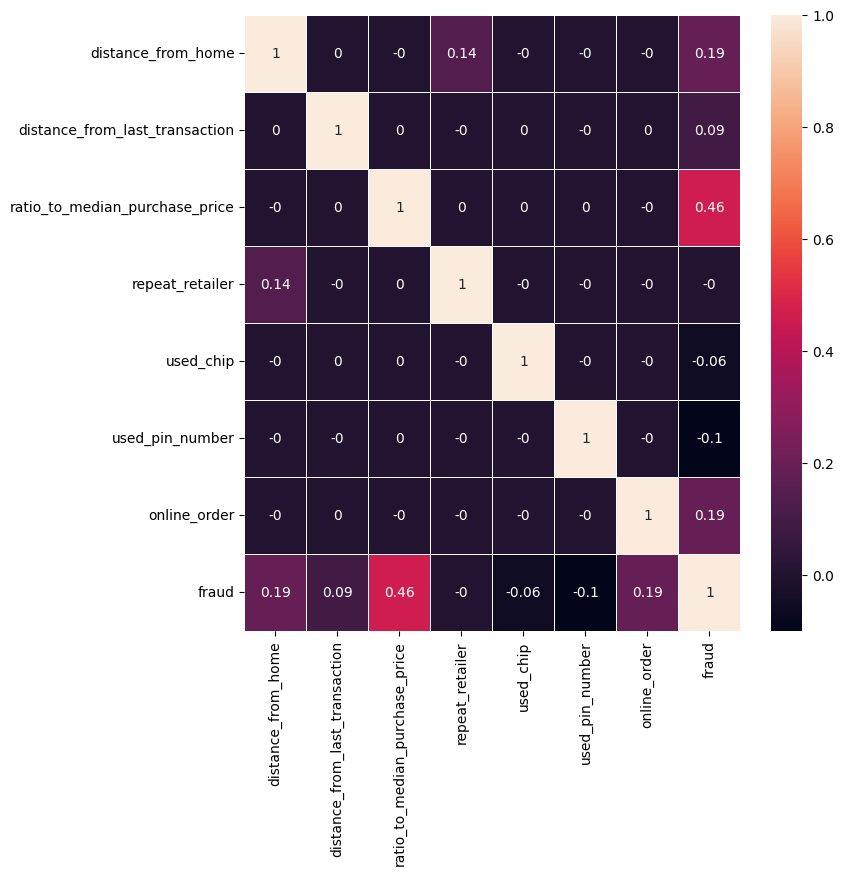

In [8]:
correlation_matrix = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [9]:
x = dados.drop(columns=['fraud'])
y = dados['fraud']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) 

## Criando modelos de árvores:


### Decion Tree
Vamos criar um modelo simples, utilizando todas as variáveis do modelo.

In [11]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth = 2)

In [12]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [13]:
y_predito = dt.predict(x_test) 

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.428\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.25, 0.5, 'x[0] <= 100.004\nentropy = 0.169\nsamples = 717444\nvalue = [699473, 17971]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.052\nsamples = 681683\nvalue = [677647, 4036]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.965\nsamples = 35761\nvalue = [21826, 13935]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.951\nsamples = 82556\nvalue = [30605, 51951]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.541\nsamples = 29007\nvalue = [25406, 3601]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.46\nsamples = 53549\nvalue = [5199, 48350]')]

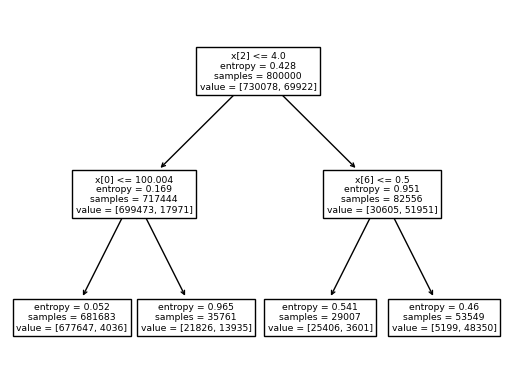

In [14]:

tree.plot_tree(dt)

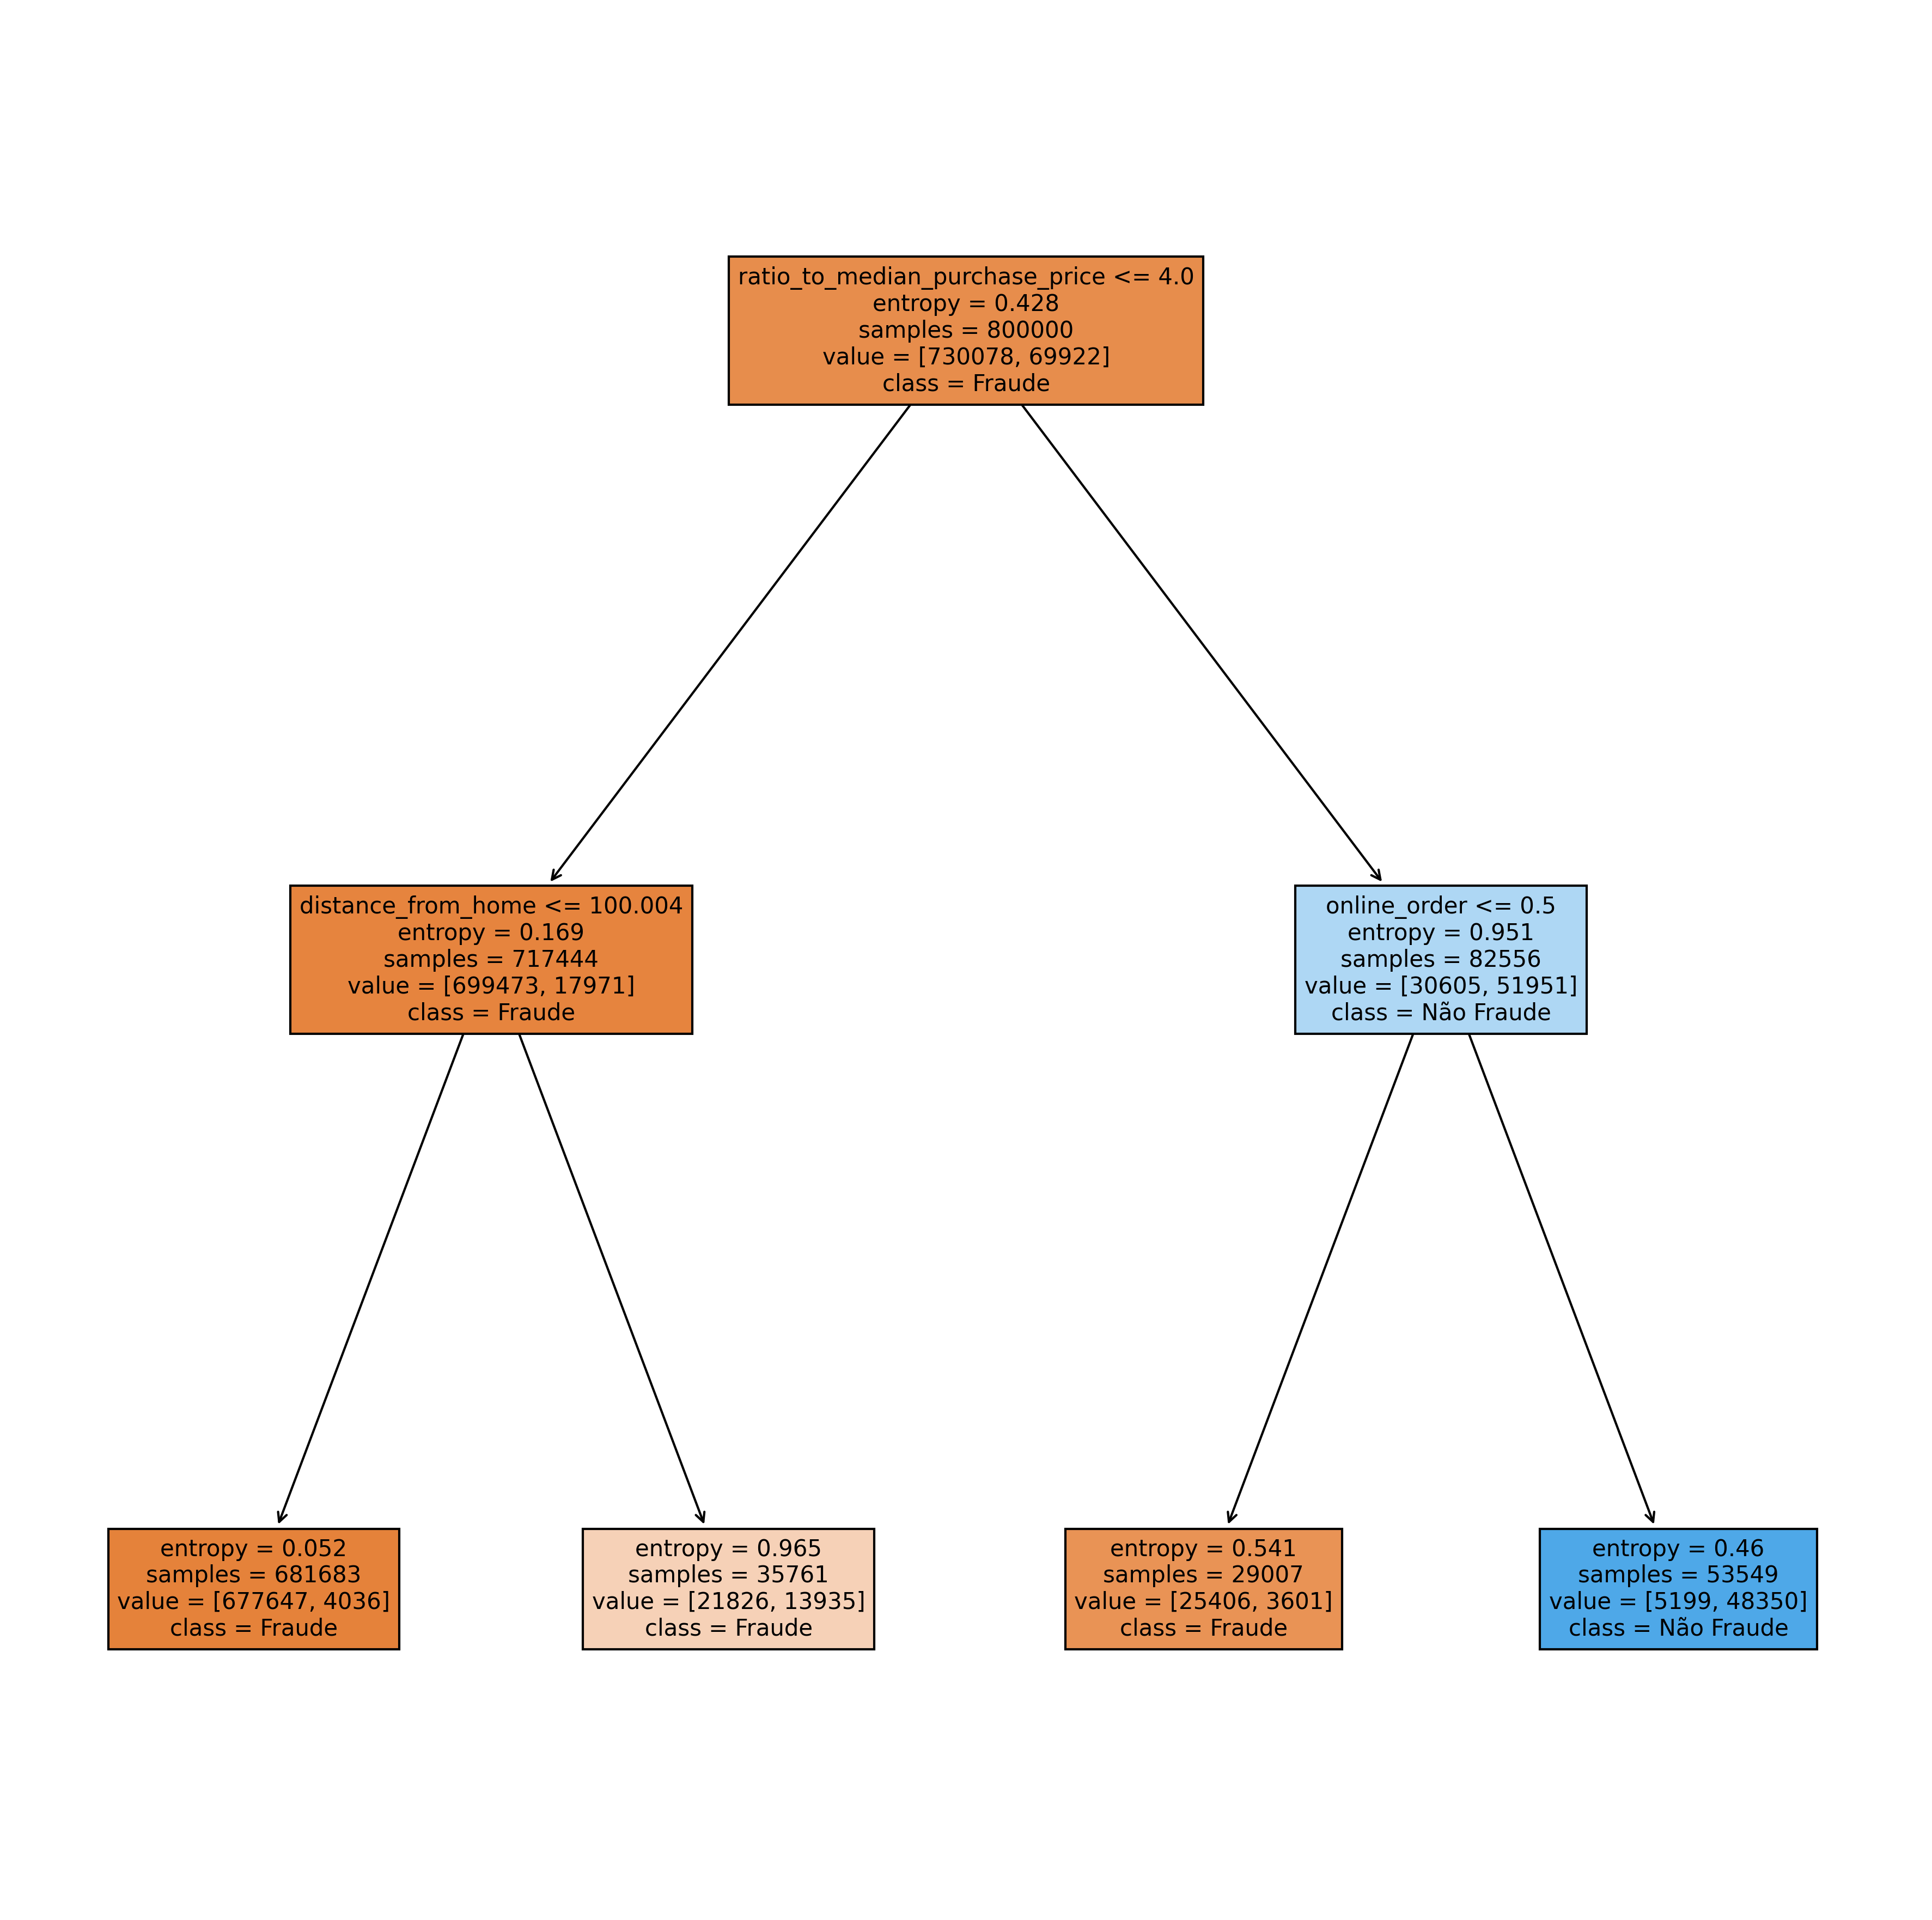

In [15]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(dt,
               feature_names = label_names, 
               class_names=class_names,
               filled = True)

In [16]:
print(accuracy_score(y_test, y_predito))

0.96675


### Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=5, max_depth = 2,  random_state=7) 
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [18]:
estimator = rf.estimators_

In [19]:
y_predito_random_forest = rf.predict(x_test) 

In [20]:
print(accuracy_score(y_test, y_predito_random_forest))

0.95339


In [21]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

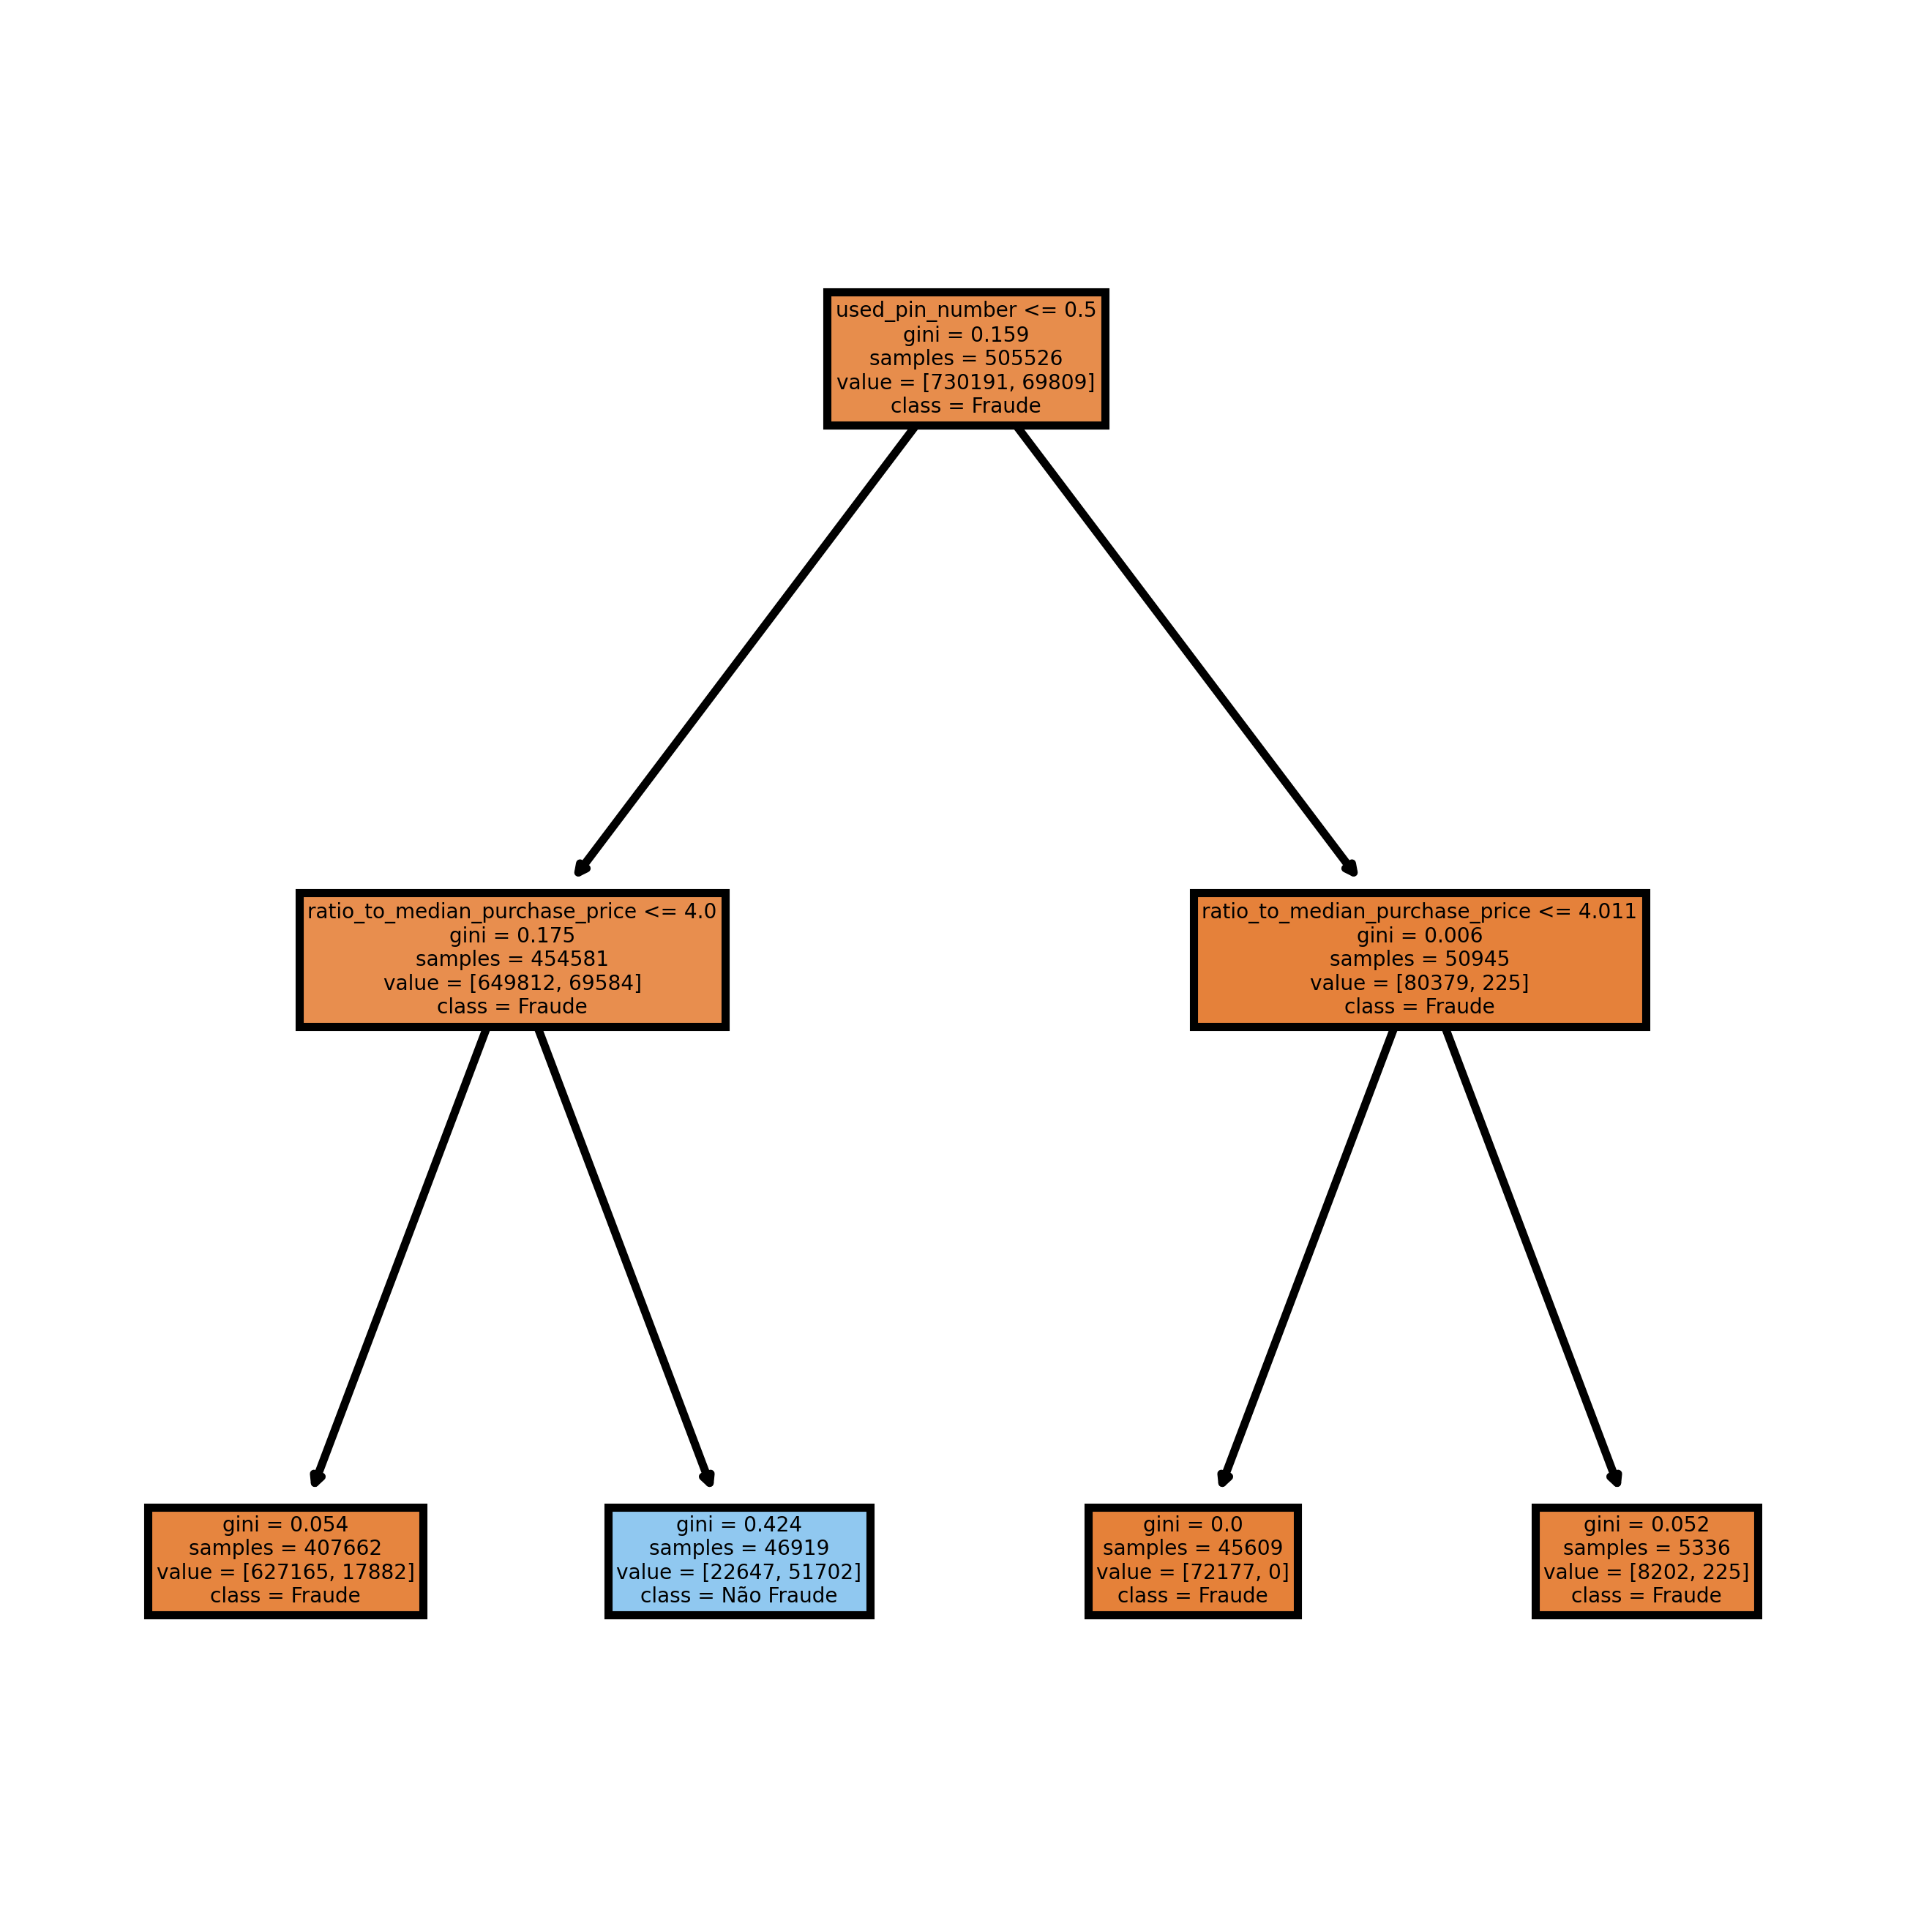

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names, 
               class_names=class_names,
               filled = True)

Plotando todas as árvores geradas:

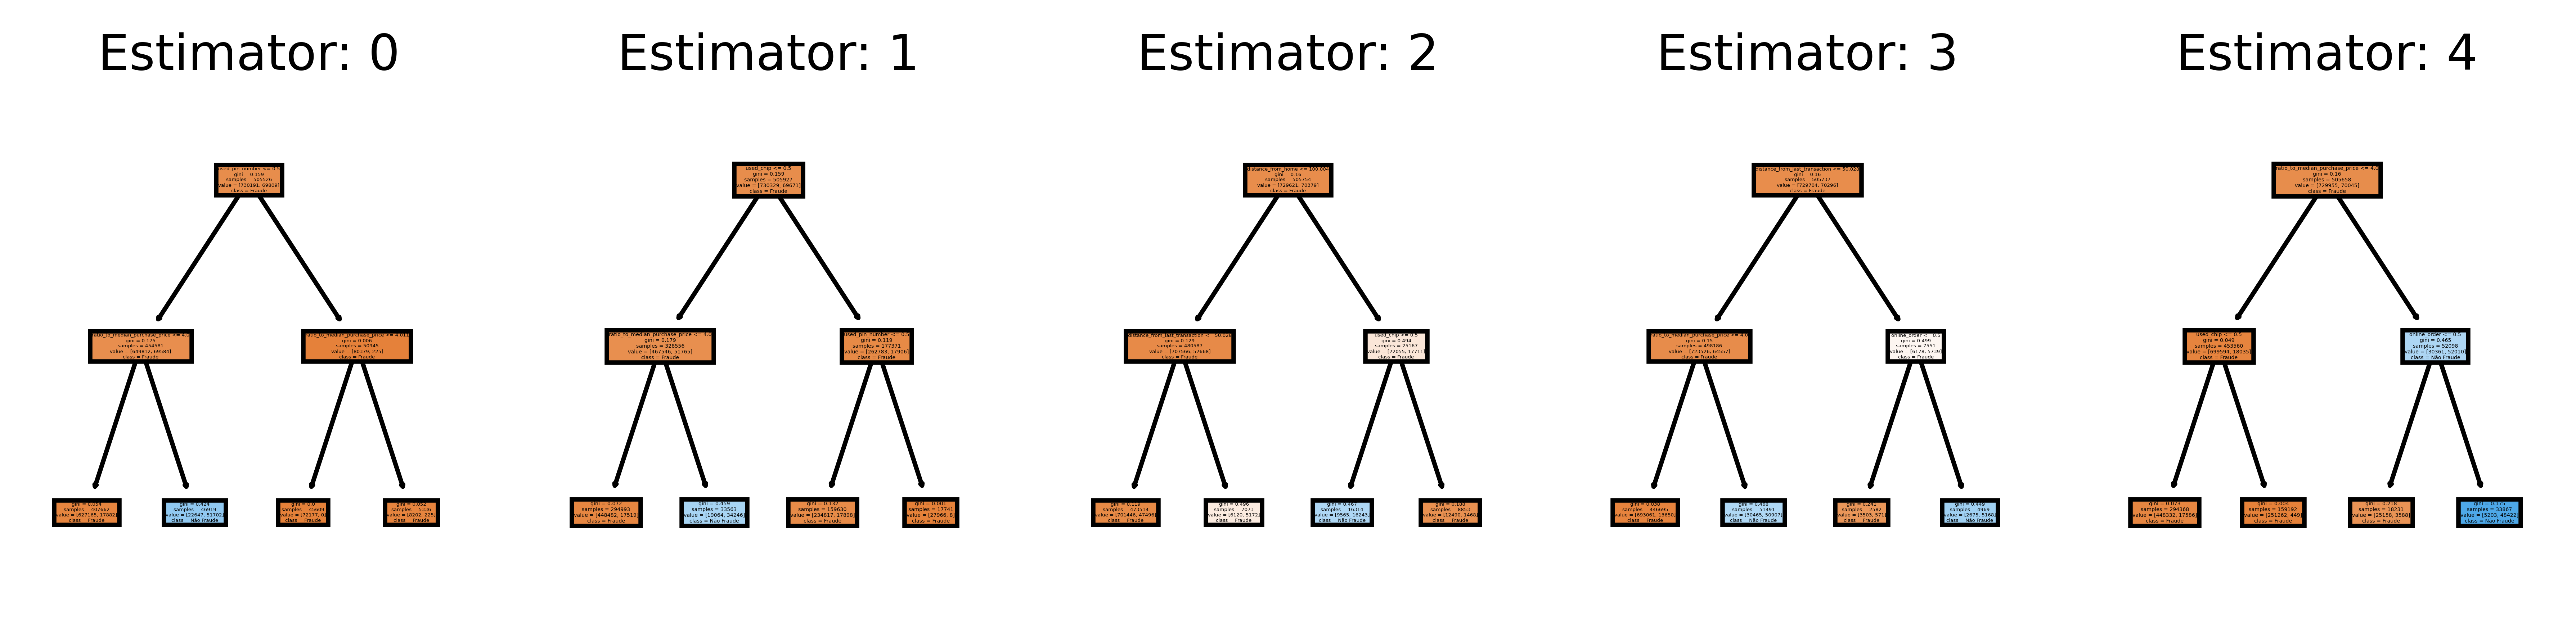

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = label_names, 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [24]:
print(rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.95321875
0.95339


O **score** nos dá uma visão da precisão média da floresta aleatória nos dados fornecidos